In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels
import pmdarima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [17]:
df = pd.read_csv(r"C:\Users\William Wu\Desktop\DS4420-Final-Project\data\sh000001.csv")

df.index = [datetime.fromisoformat(date) for date in df["date"]]

close_price = df["close"]

close_price = close_price[250:380]

close_price

2017-04-27    3152.187
2017-04-28    3154.658
2017-05-02    3143.712
2017-05-03    3135.346
2017-05-04    3127.369
                ...   
2017-10-31    3393.342
2017-11-01    3395.913
2017-11-02    3383.310
2017-11-03    3371.744
2017-11-06    3388.174
Name: close, Length: 130, dtype: float64

In [18]:
def adf_test(time_series):
    test = adfuller(close_price, autolag='AIC')
    
    print("=========================================")
    print("adf", test[0])
    print("p value", test[1])
    print("number of observation used", test[3])
    for item in test[4].items():
        print("critical value %s: =%s" % (item[0], item[1]))
    print("=========================================")


adf -0.49651193947654665
p value 0.8926953727592882
number of observation used 126
critical value 1%: =-3.4833462346078936
critical value 5%: =-2.8847655969877666
critical value 10%: =-2.5791564575459813


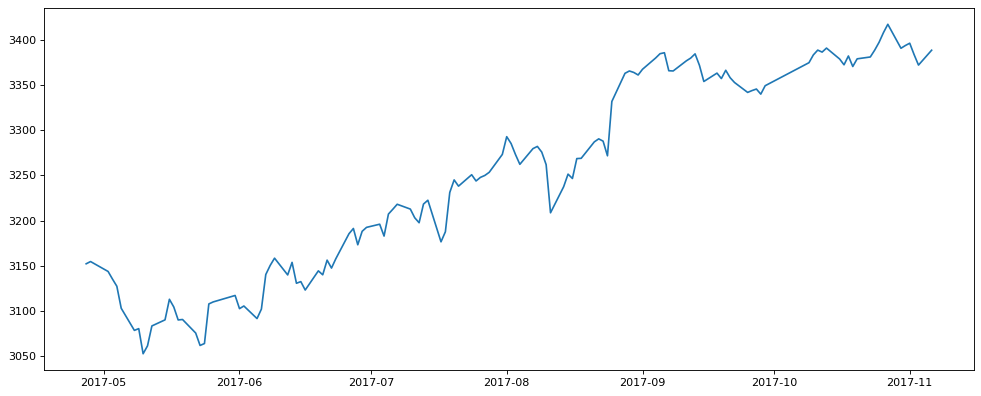

In [19]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)
plt.plot(close_price)

adf_test(close_price)


adf -0.49651193947654665
p value 0.8926953727592882
number of observation used 126
critical value 1%: =-3.4833462346078936
critical value 5%: =-2.8847655969877666
critical value 10%: =-2.5791564575459813


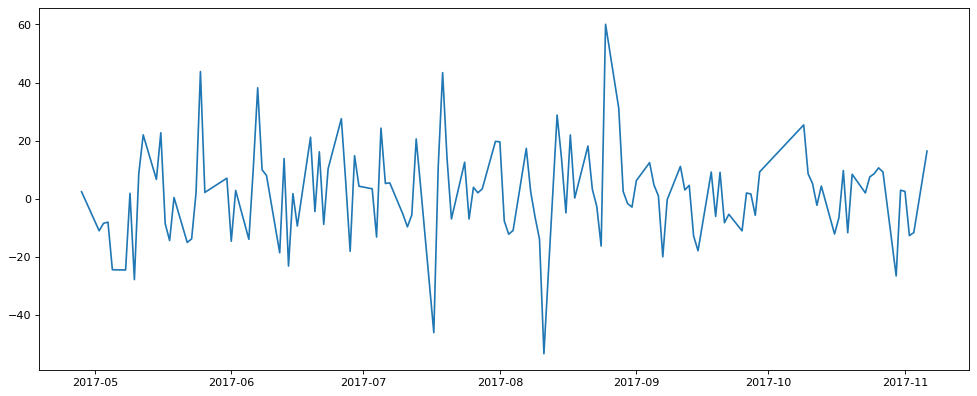

In [20]:
# 一阶差分
diff = close_price.diff()[1:]

figure(figsize=(15, 6), dpi=80)
plt.plot(diff)

adf_test(diff)

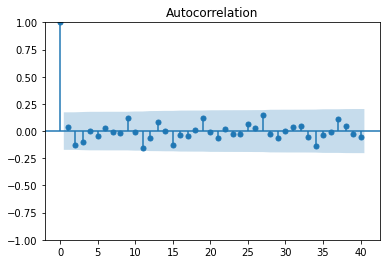

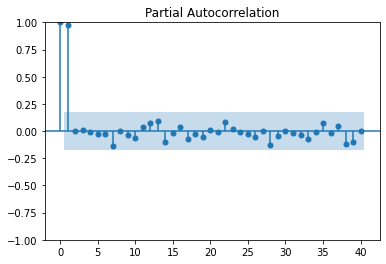

In [21]:
output_acf = plot_acf(diff, lags = 40)
output_pacf = plot_pacf(close_price, lags = 40, method="ywm")

In [22]:
model = ARIMA(endog=close_price, order=(2, 0, 1)).fit()
model.summary()

C:\Users\William Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\William Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\William Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\William Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: No

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  130
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -547.055
Date:                Sat, 23 Apr 2022   AIC                           1104.110
Time:                        21:09:36   BIC                           1118.447
Sample:                             0   HQIC                          1109.936
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3249.5210     95.809     33.917      0.000    3061.739    3437.303
ar.L1          0.6928      1.301      0.533      0.594      -1.856       3.242
ar.L2          0.2927      1.291      0.227      0.821      -2.238       2.824
ma.L1          0.3714      1.264      0.294      0.769      -2.105       2.848
sigma2       256.7615     24.033     10.683      0.000     209.657     303.866
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                19.05
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
def rmse(y_true, y_predict):
    assert len(y_true) == len(y_predict), "Length is not equal"

    rmse = 0
    for i in range(len(y_true)):
        temp = (y_true[i] - y_predict[i])**2
        rmse += temp
    rmse /= len(y_true)
    
    return rmse**0.5
        

16.040416816285333


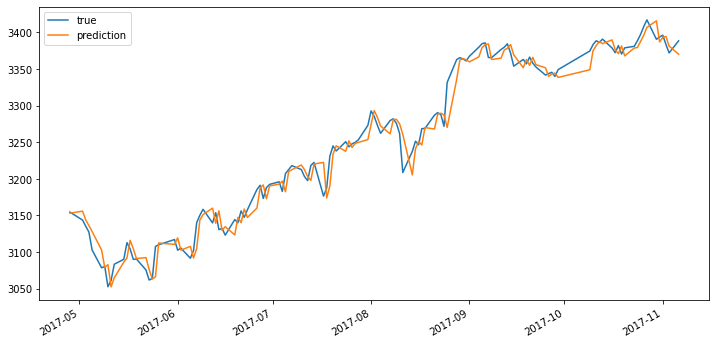

In [24]:
close_price[1:].plot(figsize=(12, 6), label="true")
model.predict()[1:].plot(label="prediction")
plt.legend()

rmse = rmse(close_price[1:], model.predict()[1:])
print(rmse)

In [71]:
BI_data = pd.read_csv(r"C:\Users\William Wu\Desktop\DS4420-Final-Project\merged_sentiment_idx.csv")
BI_data.index = [datetime.fromisoformat(date) for date in BI_data["created_time"]]

BI = BI_data["BI"][close_price.index][1:]
BI


2017-04-28   -0.347464
2017-05-02   -0.450331
2017-05-03   -0.735044
2017-05-04   -0.756498
2017-05-05   -0.717905
                ...   
2017-10-31   -0.173272
2017-11-01   -0.385056
2017-11-02   -0.761415
2017-11-03   -0.570249
2017-11-06   -0.143101
Name: BI, Length: 129, dtype: float64

In [118]:
def stock_price_change(previous_price, current_price):
    return (current_price - previous_price) / previous_price

Pearson Corrlation Coefficient: 0.5826787866387625


<Figure size 1200x480 with 0 Axes>

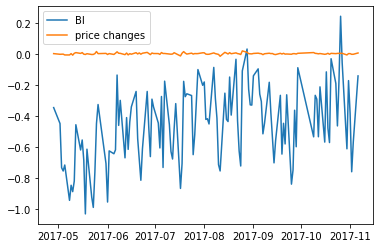

<Figure size 1200x480 with 0 Axes>

In [119]:
price_changes = [stock_price_change(close_price[i], close_price[i+1]) for i in range(len(close_price)-1)]
corr = np.corrcoef(price_changes, BI)[0][1]
print("Pearson Corrlation Coefficient:", (corr))

plt.plot(BI.index, BI, label="BI")
plt.plot(BI.index, price_changes, label="price changes")
plt.legend()
figure(figsize=(15, 6), dpi=80)
                 
                                    

In [74]:
model = ARIMA(endog=close_price[1:], exog=BI, order=(2, 1, 1)).fit()
model.summary()

C:\Users\William Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\William Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\William Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -515.899
Date:                Sat, 23 Apr 2022   AIC                           1041.798
Time:                        21:27:53   BIC                           1056.058
Sample:                             0   HQIC                          1047.592
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BI            29.7961      3.965      7.515      0.000      22.026      37.567
ar.L1          0.3910      0.857      0.456      0.648      -1.288       2.070
ar.L2         -0.1305      0.107     -1.223      0.221      -0.339       0.079
ma.L1         -0.2952      0.856     -0.345      0.730      -1.973       1.383
sigma2       185.4480     17.807     10.414      0.000     150.547     220.349
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                15.91
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.13
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
len(model.predict()) == len(close_price[1:])

True

13.618397342418975


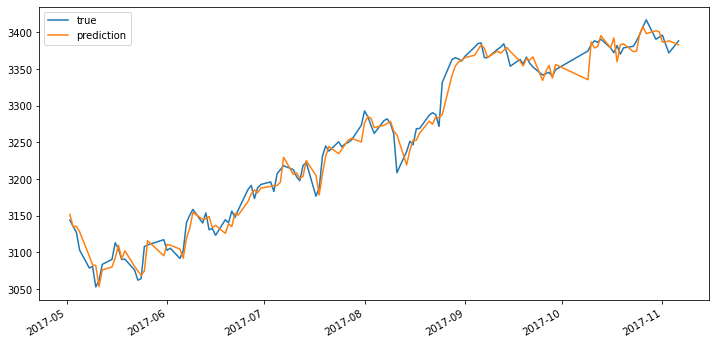

In [88]:
close_price[2:].plot(figsize=(12, 6), label="true")
model.predict()[1:].plot(label="prediction")
plt.legend()

rmse = rmse(close_price[2:], model.predict()[1:])
print(rmse)

In [97]:
def static_predict(prediction, true, dates, predict_days=3, date=0):
    
    for i in range(predict_days):
        temp = date+i+1
        predict = prediction[temp]
        true_value = true[temp]
        print("Date", dates[temp], "predict", predict, "index value", true_value, 
              "actual", "rise" if true_value >= true[temp-1] else "fall",
              "predict", "rise" if predict >= prediction[temp-1] else "fall")
    
    print("=======================================================================")
        
        
    

In [127]:
def roll_predict(prediction, true, dates):
    for i in range(len(true)-1):
        temp = i+1
        predict = prediction[temp]
        true_value = true[temp]
        print("Date", dates[temp], "predict", predict, "index value", true_value, 
              "actual", "rise" if true_value >= true[temp-1] else "fall",
              "predict", "rise" if predict >= prediction[temp-1] else "fall")
    
    print("=======================================================================")  
        

In [128]:
static_predict(model.predict()[1:], close_price[2:], close_price[2:].index, date=10)

Date 2017-05-17 00:00:00 predict 3109.563672819328 index value 3104.442 actual fall predict rise
Date 2017-05-18 00:00:00 predict 3091.1054439142035 index value 3090.139 actual fall predict fall
Date 2017-05-19 00:00:00 predict 3101.916741058241 index value 3090.631 actual rise predict rise


In [130]:
roll_predict(model.predict()[1:], close_price[2:], close_price[2:].index)

Date 2017-05-03 00:00:00 predict 3134.45825721945 index value 3135.346 actual fall predict fall
Date 2017-05-04 00:00:00 predict 3135.5218210549774 index value 3127.369 actual fall predict rise
Date 2017-05-05 00:00:00 predict 3128.0391243993963 index value 3103.038 actual fall predict fall
Date 2017-05-08 00:00:00 predict 3094.6206536366294 index value 3078.613 actual fall predict fall
Date 2017-05-09 00:00:00 predict 3082.6741447166332 index value 3080.527 actual rise predict fall
Date 2017-05-10 00:00:00 predict 3081.8416746228127 index value 3052.785 actual fall predict fall
Date 2017-05-11 00:00:00 predict 3053.1740754865255 index value 3061.5 actual rise predict fall
Date 2017-05-12 00:00:00 predict 3075.9271832656273 index value 3083.513 actual rise predict rise
Date 2017-05-15 00:00:00 predict 3079.9252718545654 index value 3090.229 actual rise predict rise
Date 2017-05-16 00:00:00 predict 3092.172314291036 index value 3112.964 actual rise predict rise
Date 2017-05-17 00:00:00 